# A Comparative Study of Different Machine Learning Algorithms for the Prediction of Coronary Artery Disease: A Classification Approach

# Overview
    1. Introduction:
        Goals
        Background Research
        Features & Predictor
 
    2. Data Wrangling
    
    3. Exploratory Data Analysis:
        Correlations:
            Matrix
            Heatmap
            Histograms
        
    4. Model Training & Testing (Supervised Learning):
        Model Selection
        Training Using Cross Validation
        
    5. Results:
        Model Comparsion Table
    
    6. Conclusion & Further Research

# 1. Introduction

# 1.1 Goals:
    -Can machine learning algorithms accurately predict the presence of CAD in patients using the given data?
    -Which machine learning algorithm performs the best in predicting CAD based on the given data?
    -Can we combine the top diverese models to create an ensemble model which yields to a higher AUC Score?

# 1.2 Background Research
CAD is the third leading cause of death worldwide and detection is crucial for effective treatment and management. Machine Learning has the potential to improve CAD diagnosis by providing a non-invasive and efficient method for risk prediction. This research is important as it aims to improve the accuracy and generalizability of these models, which can help to identify high-risk individuals early, leading to early interventions and potentially reducing the burden of CAD on the healthcare system. These interventions would include lifestyle changes that would help lower the risk of the patient obtaining CAD in the future. However, it is important to keep in mind that this research is not a substitute for human diagnosis and the final diagnosis should always be made by a healthcare professional.

This dataset is obtained through Kaggle which includes four databases: Cleveland, Hungary, Switzerland, and Long Beach V. The objective of the dataset is to diagnostically predict whether or not a patient has CAD, based on certain diagnostic measurements included in the dataset. There are a total of 297 patients, including males and females aged between 29 and 77.

# 1.3 Features and Predictor

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1. Age (#)
2. Sex: 1 = Male, 0 = Female (Binary)
3. (cp): Chest Pain Type: Value 0 = Typical Angina, Value 1 = Atypical Angina, Value 2 = Non-Anginal Pain, Value 3: Asymptomatic
4. (trestbps) Resting Blood Pressure (#)
5. (chol) Serum Cholesterol in mg/dl (#)
6. (fbs) Fasting Blood Sugar > 120 mg/dl: 1 = True, 0 = False (Binary)
7. (restecg) Resting Electrocardiographic Results (Values: 0, 1, 2)
8. (thalach) Maximum Heart Rate Achieved (#)
9. (exang) Exercised Induced Angina: 1 = Yes, 0 = No (Binary)
10. (oldpeak) ST Depression Induced by Exercise Relative to Rest (#)
11. (slope) of the Peak Exercise ST Segment (Ordinal) (Value 0: Upsloping , Value 1: Flat , Value 2: Downsloping )
12. (ca) Number of Major Vessels (0-3, Ordinal) Colored by Fluoroscopy 
13. (thal) Maximum Heart Rate Achieved - (Ordinal): 0 = Normal; 1 = fixed defect; 2= reversible defect

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Wrangling

In [4]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [15]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
print(data.shape)

(297, 14)


In [8]:
# returns the number of unique values for each variable.
data.nunique(axis=0)

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [9]:
# Display the Missing Values
print(data.isna().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [22]:
#Checks for duplicated values
data = pd.read_csv('heart_cleveland_upload.csv')
distinct_count = len(data.drop_duplicates())
duplicate_count = len(data) - distinct_count
f'{distinct_count} distinct rows and {duplicate_count} duplicated rows'

'297 distinct rows and 0 duplicated rows'

In [11]:
#Checks how many are 0's and 1's
data['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

# 3. Exploratory Data Analysis

# 3.1 Correlations

3.1.1 Correlation Matrix

<AxesSubplot:>

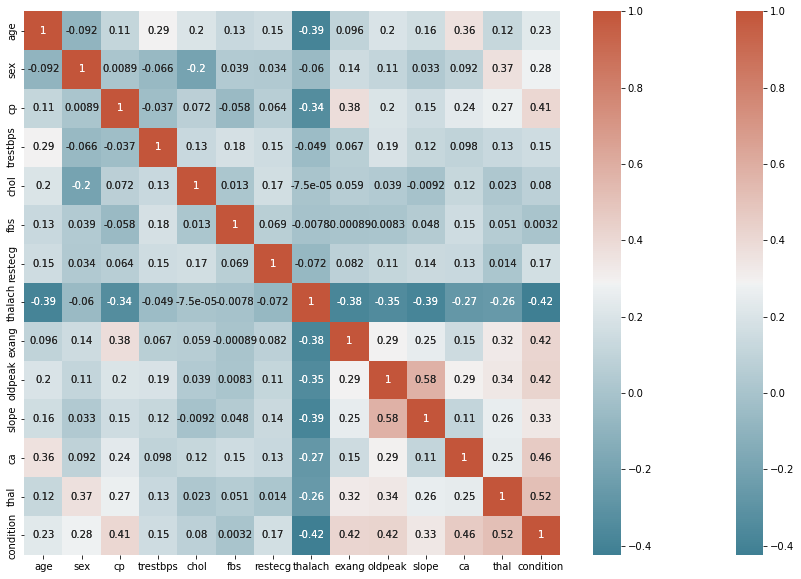

In [12]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [5]:
#calculate the correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

                age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex       -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp         0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps   0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol       0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs        0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg    0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach   -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang      0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak    0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope      0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca         0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal       0.120795  0.370556  0.266275  0.130612  

In [6]:
# Sort the correlation matrix by the absolute correlation values of the target variable
corr_matrix_abs = abs(corr_matrix["condition"]).sort_values(ascending=False)

# Print the top correlated features with the target variable
print(corr_matrix_abs)

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
thalach      0.423817
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
Name: condition, dtype: float64


3.1.2 Correlation Heatmap

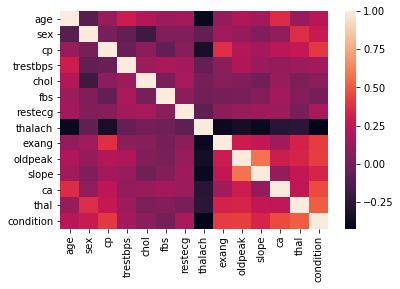

In [7]:
sns.heatmap(data.corr())

3.1.3 Correlation Histograms

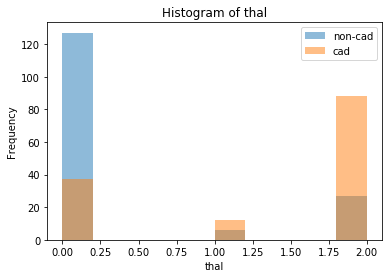

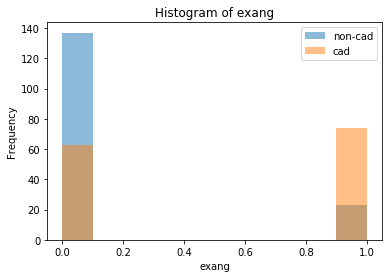

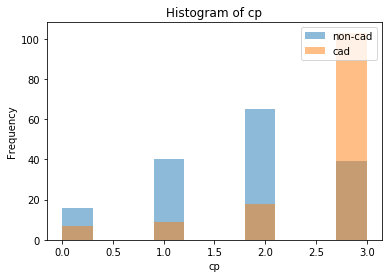

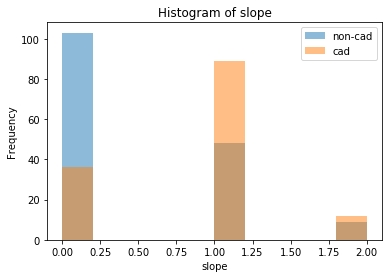

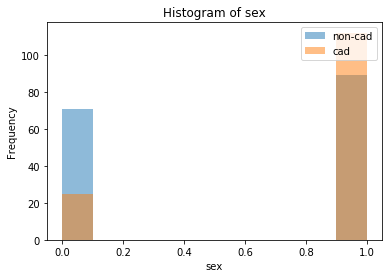

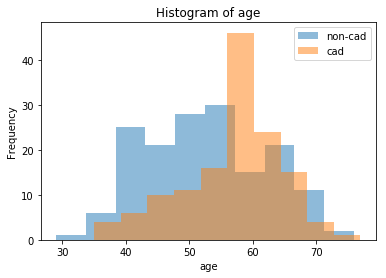

In [14]:
for col in ['thal','exang','cp','slope', 'sex','age']:
    plt.hist(data[data['condition']==0][col], 10, alpha=0.5, label='non-cad')
    plt.hist(data[data['condition']==1][col], 10, alpha=0.5, label='cad')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

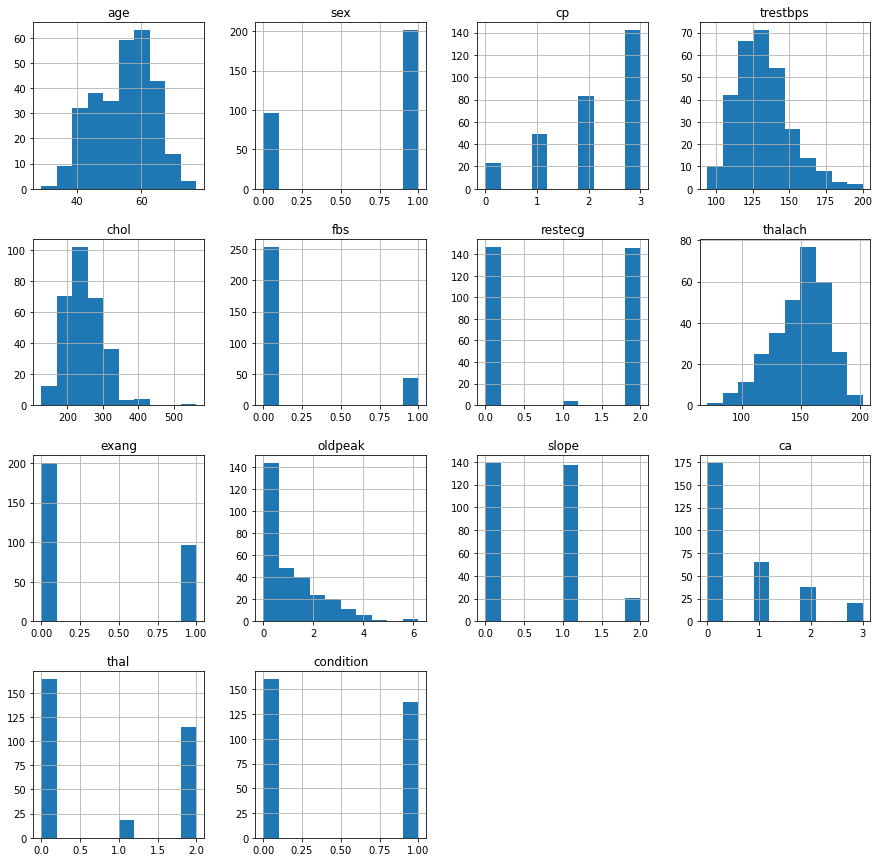

In [15]:
data.hist(figsize=(15,15))

# 4. Model Training & Testing (Supervised Learning)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Split the data into features (X) and target (y)
y = data['condition']
X = data.drop(['condition'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


Accuracy: 0.73
Precision: 0.70
Recall: 0.75
F1 score: 0.72
Confusion matrix:
[[23  9]
 [ 7 21]]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


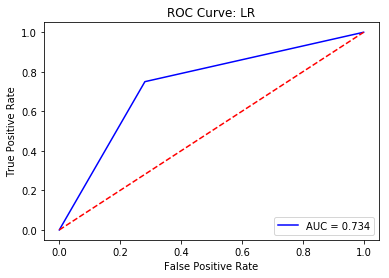

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Running model: LR, mean accuracy: 0.85617 +/- 0.03503
Running model: LR, mean precision: 0.86137 +/- 0.05240
Running model: LR, mean recall: 0.82511 +/- 0.07982
Running model: LR, mean auc_scores: 0.92716 +/- 0.03211


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Create an instance of the logistic regression model
model_1 = LogisticRegression()

# Train the model on the training data
model_1.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = model_1.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print("Confusion matrix:")
print(conf_matrix)

fpr, tpr, threshold = roc_curve(y_test, y_pred1)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred1)
plt.title('ROC Curve: LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Using Cross-Validation 
model_name = 'LR'
N_FOLDS = 5
scores = cross_val_score(model_1, X_train, y_train, cv=N_FOLDS)
print('Running model: ' + model_name + ', mean accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))
precision_scores = cross_val_score(model_1, X_train, y_train, cv=N_FOLDS, scoring="precision")
print('Running model: ' + model_name + ', mean precision: %.5f +/- %.5f' % (np.mean(precision_scores), np.std(precision_scores)))
recall_scores = cross_val_score(model_1, X_train, y_train, cv=N_FOLDS, scoring="recall")
print('Running model: ' + model_name + ', mean recall: %.5f +/- %.5f' % (np.mean(recall_scores), np.std(recall_scores)))
auc_scores = cross_val_score(model_1, X_train, y_train, cv=N_FOLDS, scoring="roc_auc")
print('Running model: ' + model_name + ', mean auc_scores: %.5f +/- %.5f' % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.57
Precision: 0.54
Recall: 0.50
F1 score: 0.52
Confusion matrix:
[[20 12]
 [14 14]]


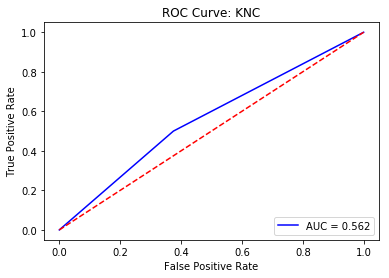

Running model: KNC, mean accuracy: 0.68816 +/- 0.04772
Running model: KNC, mean precision: 0.68227 +/- 0.06060
Running model: KNC, mean recall: 0.61558 +/- 0.07577
Running model: KNC, mean auc_scores: 0.71390 +/- 0.06277


In [12]:
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier() 
model_2.fit(X_train, y_train)

y_pred2 =  model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print("Confusion matrix:")
print(conf_matrix)

fpr, tpr, threshold = roc_curve(y_test, y_pred2)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred2)
plt.title('ROC Curve: KNC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Using Cross-Validation 
model_name = 'KNC'
N_FOLDS = 5
scores = cross_val_score(model_2, X_train, y_train, cv=N_FOLDS)
print('Running model: ' + model_name + ', mean accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))
precision_scores = cross_val_score(model_2, X_train, y_train, cv=N_FOLDS, scoring="precision")
print('Running model: ' + model_name + ', mean precision: %.5f +/- %.5f' % (np.mean(precision_scores), np.std(precision_scores)))
recall_scores = cross_val_score(model_2, X_train, y_train, cv=N_FOLDS, scoring="recall")
print('Running model: ' + model_name + ', mean recall: %.5f +/- %.5f' % (np.mean(recall_scores), np.std(recall_scores)))
auc_scores = cross_val_score(model_2, X_train, y_train, cv=N_FOLDS, scoring="roc_auc")
print('Running model: ' + model_name + ', mean auc_scores: %.5f +/- %.5f' % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.72
Precision: 0.67
Recall: 0.79
F1 score: 0.72
Confusion matrix:
[[21 11]
 [ 6 22]]


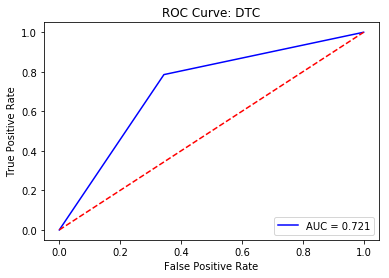

Running model: DTC, mean accuracy: 0.73906 +/- 0.06080
Running model: DTC, mean precision: 0.71742 +/- 0.06582
Running model: DTC, mean recall: 0.71645 +/- 0.07604
Running model: DTC, mean auc_scores: 0.73730 +/- 0.06122


In [13]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier(random_state=1)
model_3.fit(X_train, y_train)

y_pred3 =  model_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print("Confusion matrix:")
print(conf_matrix)

fpr, tpr, threshold = roc_curve(y_test, y_pred3)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred3)
plt.title('ROC Curve: DTC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Using Cross-Validation 
model_name = 'DTC'
N_FOLDS = 5
scores = cross_val_score(model_3, X_train, y_train, cv=N_FOLDS)
print('Running model: ' + model_name + ', mean accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))
precision_scores = cross_val_score(model_3, X_train, y_train, cv=N_FOLDS, scoring="precision")
print('Running model: ' + model_name + ', mean precision: %.5f +/- %.5f' % (np.mean(precision_scores), np.std(precision_scores)))
recall_scores = cross_val_score(model_3, X_train, y_train, cv=N_FOLDS, scoring="recall")
print('Running model: ' + model_name + ', mean recall: %.5f +/- %.5f' % (np.mean(recall_scores), np.std(recall_scores)))
auc_scores = cross_val_score(model_3, X_train, y_train, cv=N_FOLDS, scoring="roc_auc")
print('Running model: ' + model_name + ', mean auc_scores: %.5f +/- %.5f' % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.75
Precision: 0.72
Recall: 0.75
F1 score: 0.74
Confusion matrix:
[[24  8]
 [ 7 21]]


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


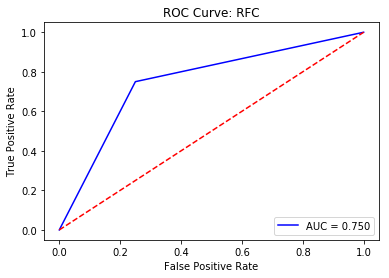

Running model: RFC, mean accuracy: 0.82674 +/- 0.02611
Running model: RFC, mean precision: 0.86989 +/- 0.02124
Running model: RFC, mean recall: 0.73333 +/- 0.05637
Running model: RFC, mean auc_scores: 0.89708 +/- 0.03419


In [16]:
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier(random_state=1)
model_4.fit(X_train, y_train)

y_pred4 =  model_4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print("Confusion matrix:")
print(conf_matrix)

fpr, tpr, threshold = roc_curve(y_test, y_pred4)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred4)
plt.title('ROC Curve: RFC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
model_name = 'RFC'
N_FOLDS = 5

#Using Cross-Validation 
scores = cross_val_score(model_4, X_train, y_train, cv=N_FOLDS)
print('Running model: ' + model_name + ', mean accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))
precision_scores = cross_val_score(model_4, X_train, y_train, cv=N_FOLDS, scoring="precision")
print('Running model: ' + model_name + ', mean precision: %.5f +/- %.5f' % (np.mean(precision_scores), np.std(precision_scores)))
recall_scores = cross_val_score(model_4, X_train, y_train, cv=N_FOLDS, scoring="recall")
print('Running model: ' + model_name + ', mean recall: %.5f +/- %.5f' % (np.mean(recall_scores), np.std(recall_scores)))
auc_scores = cross_val_score(model_4, X_train, y_train, cv=N_FOLDS, scoring="roc_auc")
print('Running model: ' + model_name + ', mean auc_scores: %.5f +/- %.5f' % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.75
Precision: 0.71
Recall: 0.79
F1 score: 0.75
Confusion matrix:
[[23  9]
 [ 6 22]]


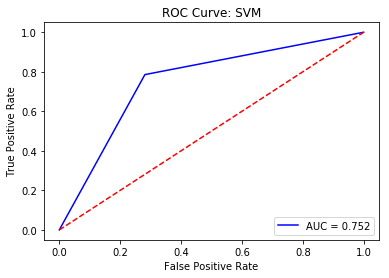

Running model: SVM, mean accuracy: 0.85192 +/- 0.03904
Running model: SVM, mean precision: 0.85146 +/- 0.04119
Running model: SVM, mean recall: 0.82511 +/- 0.08957
Running model: SVM, mean auc_scores: 0.92186 +/- 0.03163


In [17]:
from sklearn import svm

model_5 = svm.SVC(kernel='linear')
model_5.fit(X_train, y_train)

# Make predictions on the testing data
y_pred5 = model_5.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred5)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
conf_matrix = confusion_matrix(y_test, y_pred5)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print("Confusion matrix:")
print(conf_matrix)

fpr, tpr, threshold = roc_curve(y_test, y_pred5)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred5)
plt.title('ROC Curve: SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Using Cross-Validation 
model_name = 'SVM'
N_FOLDS = 5
scores = cross_val_score(model_5, X_train, y_train, cv=N_FOLDS)
print('Running model: ' + model_name + ', mean accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))
precision_scores = cross_val_score(model_5, X_train, y_train, cv=N_FOLDS, scoring="precision")
print('Running model: ' + model_name + ', mean precision: %.5f +/- %.5f' % (np.mean(precision_scores), np.std(precision_scores)))
recall_scores = cross_val_score(model_5, X_train, y_train, cv=N_FOLDS, scoring="recall")
print('Running model: ' + model_name + ', mean recall: %.5f +/- %.5f' % (np.mean(recall_scores), np.std(recall_scores)))
auc_scores = cross_val_score(model_5, X_train, y_train, cv=N_FOLDS, scoring="roc_auc")
print('Running model: ' + model_name + ', mean auc_scores: %.5f +/- %.5f' % (np.mean(auc_scores), np.std(auc_scores)))

## Neural Network

In [47]:
from sklearn.model_selection import KFold


# Define the K-fold cross-validation splits
n_splits = 5
skf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

#from tensorflow import keras 
from tensorflow.keras import layers
import random

random.seed(23)

model = keras.Sequential([
 #layers.Dense(15, activation="relu"),
 layers.Dense(20, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
    

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC()])

# Train and evaluate the model using K-fold cross-validation
scores = []
for train_idx, val_idx in skf.split(X_train, y_train):
    X_trainF, X_valF = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainF, y_valF = y_train.iloc[train_idx], y_train.iloc[val_idx]
    model.fit(X_trainF, y_trainF, epochs=50, batch_size=16, verbose=0)
    score = model.evaluate(X_valF, y_valF, verbose=0)
    scores.append(score[1])

# Report the mean and standard deviation of the K-fold cross-validation scores
print('AUC scores:', scores)
print('AUC: %.2f%% (+/- %.2f%%)' % (np.mean(scores)*100, np.std(scores)*100))

AUC scores: [0.7927690148353577, 0.9704861044883728, 0.8956043720245361, 0.976190447807312, 0.8836363554000854]
AUC: 90.37% (+/- 6.71%)


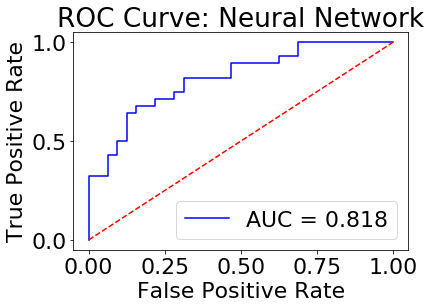

Neural Network test set accuracy:  0.7166666666666667


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

random.seed(23)

y_pred7 = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred7)
#fpr, tpr, threshold = roc_curve(y_test_subset, y_pred[:,1])
#roc_auc = metrics.auc(fpr, tpr)

roc_auc = roc_auc_score(y_test, y_pred7)


plt.title('ROC Curve: Neural Network')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# for accuracy need to convert y_pred values to 0 or 1
def round(y):
    result = 0
    if y >= 0.5:
        result = 1
    return result

y_pred_rounded = [round(y_pred7[i]) for i in range(len(y_pred7))]
print('Neural Network test set accuracy: ', accuracy_score(y_test, y_pred_rounded))

## Ensemble model

Ensemble model auc score:  0.828125


C:\Users\adi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


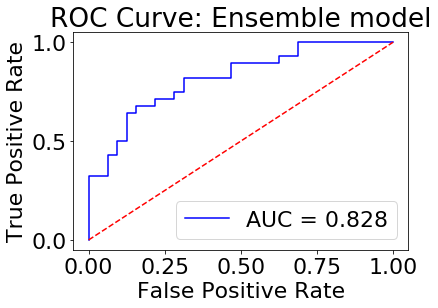

In [40]:
proba = np.stack([model_1.predict_proba(X_test)[:,1],
                  model_4.predict_proba(X_test)[:,1],
                  model.predict_proba(X_test)[:,0]]).T

mean_proba = proba.mean(axis=1)
ensemble_auc = roc_auc_score(y_test, y_score=mean_proba)
print("Ensemble model auc score: ", ensemble_auc)


plt.title('ROC Curve: Ensemble model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % ensemble_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Results

# 5.1 Model Comparsion Table

In [3]:
# Create a list of dictionaries with the data
data = [
    {'Model Name': 'Logistic Regression', 'Cross Validation AUC Score': 0.923, 'Test Set AUC Score': 0.734},
    {'Model Name': 'K Neighbors Classifier', 'Cross Validation AUC Score': 0.715, 'Test Set AUC Score': 0.562},
    {'Model Name': 'Neural Network', 'Cross Validation AUC Score': 0.928, 'Test Set AUC Score': 0.818},
    {'Model Name': 'Random Forest Classifier', 'Cross Validation AUC Score': 0.926, 'Test Set AUC Score': 0.734},
    {'Model Name': 'Decision Tree Classifier', 'Cross Validation AUC Score': 0.741, 'Test Set AUC Score': 0.721},
    {'Model Name': 'Support Vector Machine', 'Cross Validation AUC Score': 0.923, 'Test Set AUC Score': 0.752},
    {'Model Name': 'Ensemble Model (LR + NN + RFC)', 'Cross Validation AUC Score': None, 'Test Set AUC Score': 0.828},
]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the 'Model Name' column as the index
df.set_index('Model Name', inplace=True)

# Display the DataFrame
print(df)

                                Cross Validation AUC Score  Test Set AUC Score
Model Name                                                                    
Logistic Regression                                  0.923               0.734
K Neighbors Classifier                               0.715               0.562
Neural Network                                       0.928               0.818
Random Forest Classifier                             0.926               0.734
Decision Tree Classifier                             0.741               0.721
Support Vector Machine                               0.923               0.752
Ensemble Model (LR + NN + RFC)                         NaN               0.828


# 6. Conclusion & Further Research

In summary, our study demonstrates that machine learning algorithms are capable of accurately predicting the presence of coronary artery disease using clinical and demographic data. The neural network and ensemble model (combining logistic regression, neural network, and random forest classifier) outperformed other models in predicting CAD based on both cross validation and test set AUC scores. The neural network model performed the best with an AUC score of 0.928 on the cross-validation set, while the ensemble model performed the best with an AUC score of 0.828 on the test set. In the future, we would like to explore hyperparameter tuning of models and data collected from different sources to achieve better performance. A future direction for this project is to create a software/app that helps healthcare professionals input patient features to determine CAD risk and personalized prevention strategies, such as healthy eating, exercise, and quitting smoking.